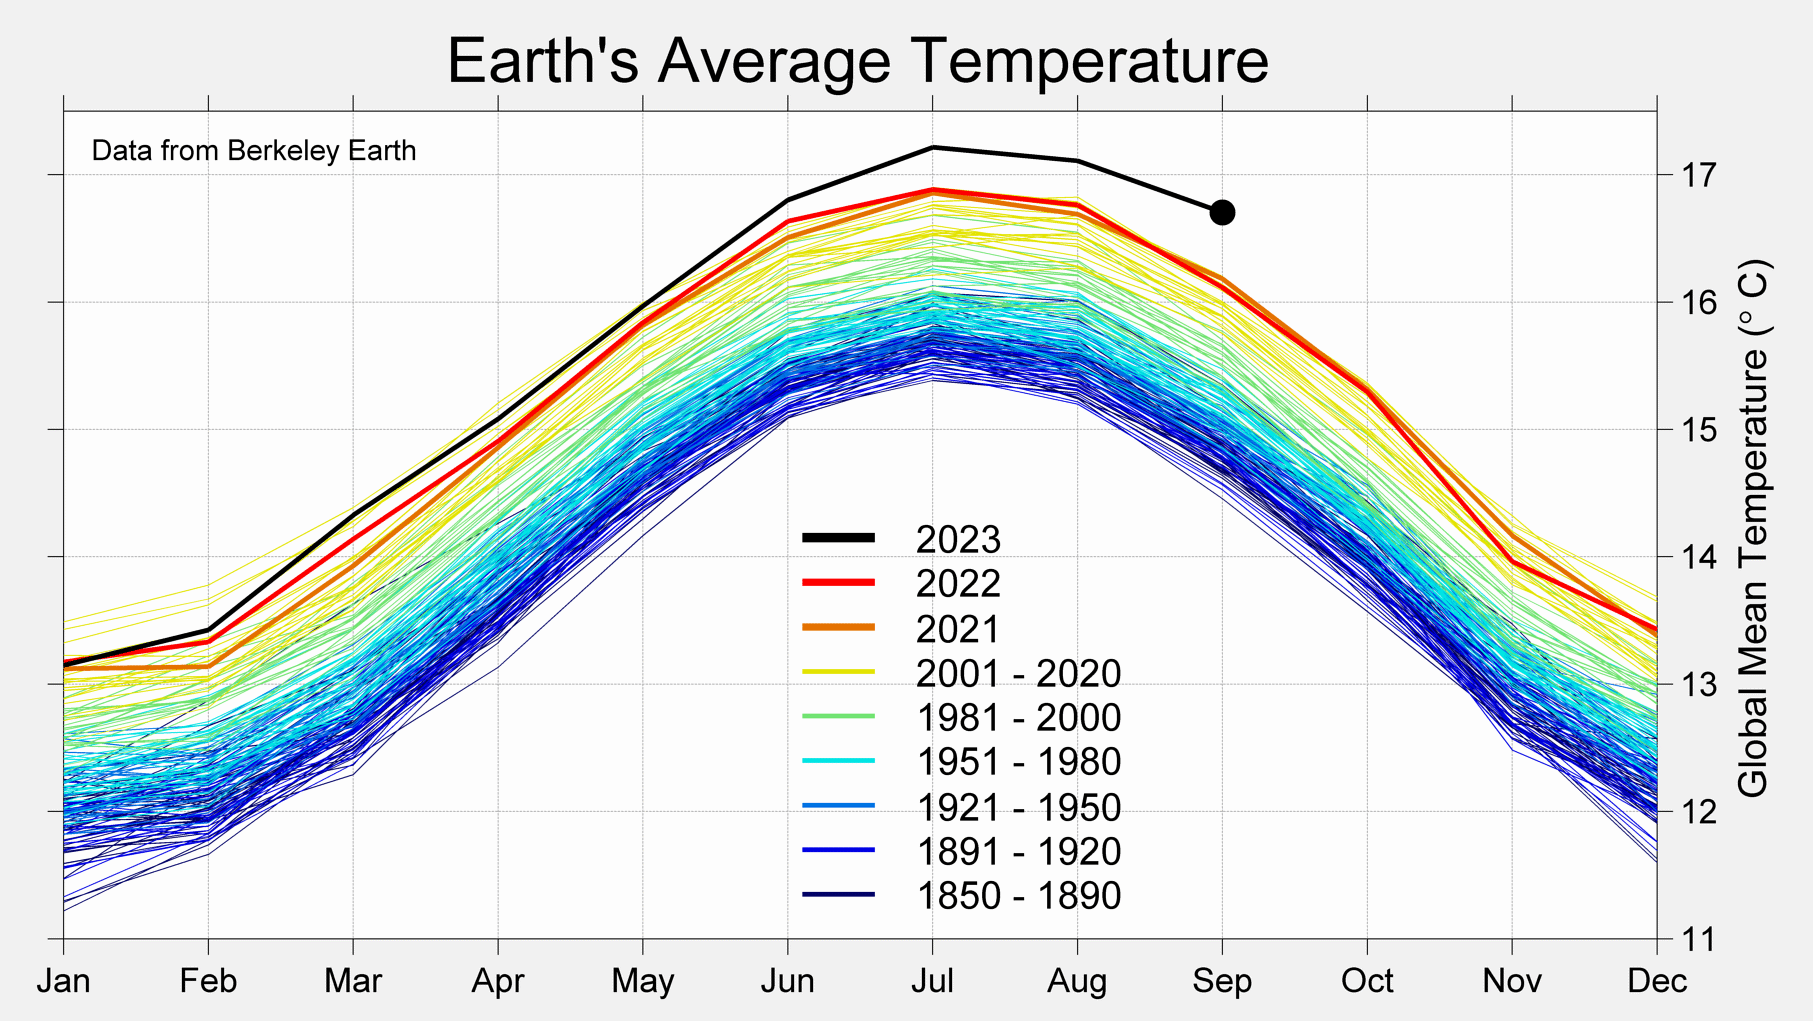

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('Surface_Temperature.csv')

In [41]:
data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [42]:
columns_to_drop = [0,1,2,3,4,5,6,7,8,9]  
data.drop(data.columns[columns_to_drop], axis=1, inplace = True)

In [43]:
data.columns = data.columns.str.strip()

In [44]:
data.head()

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1961   188 non-null    float64
 1   F1962   189 non-null    float64
 2   F1963   188 non-null    float64
 3   F1964   188 non-null    float64
 4   F1965   188 non-null    float64
 5   F1966   192 non-null    float64
 6   F1967   191 non-null    float64
 7   F1968   191 non-null    float64
 8   F1969   190 non-null    float64
 9   F1970   189 non-null    float64
 10  F1971   191 non-null    float64
 11  F1972   192 non-null    float64
 12  F1973   193 non-null    float64
 13  F1974   192 non-null    float64
 14  F1975   188 non-null    float64
 15  F1976   189 non-null    float64
 16  F1977   185 non-null    float64
 17  F1978   189 non-null    float64
 18  F1979   189 non-null    float64
 19  F1980   191 non-null    float64
 20  F1981   191 non-null    float64
 21  F1982   192 non-null    float64
 22  F1

In [46]:
data.isnull().sum()

F1961    37
F1962    36
F1963    37
F1964    37
F1965    37
         ..
F2018    12
F2019    12
F2020    13
F2021    12
F2022    12
Length: 62, dtype: int64

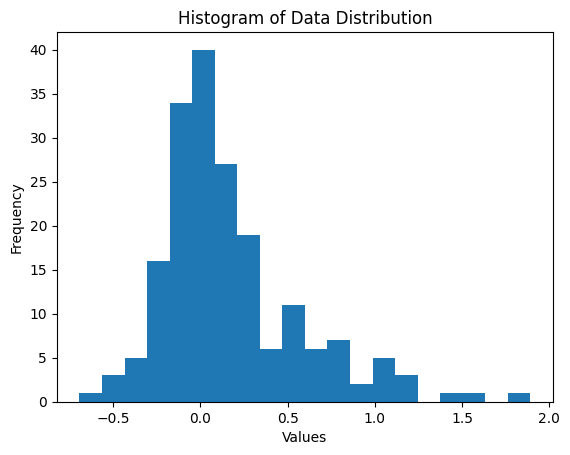

In [47]:
import matplotlib.pyplot as plt

# Assuming 'data' is your numerical data
plt.hist(data['F1961'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data Distribution')
plt.show()

In [48]:
# Replace missing values in each row with the mean of that row
data = data.apply(lambda row: row.fillna(row.mean()), axis=1)

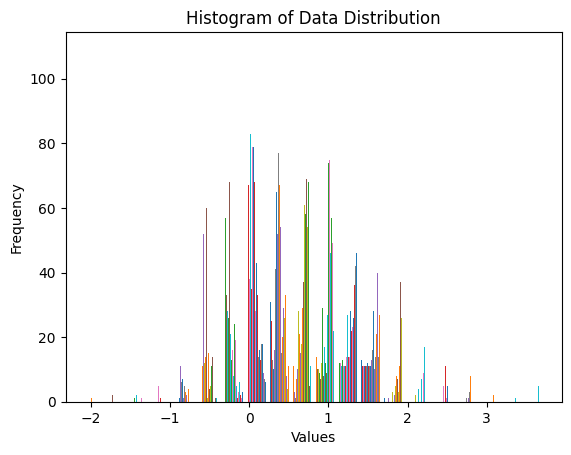

In [49]:
import matplotlib.pyplot as plt

# Assuming 'data' is your numerical data
plt.hist(data, bins=20)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data Distribution')
plt.show()

In [50]:
# Create a DataFrame with a column containing values from 1961 to 2021
years = list(range(1961, 2023)) 
temp_increase = data.mean()
data = pd.DataFrame({'Year': years,'Temperature Increase': temp_increase.values})

In [51]:
data.head()

,Year,Temperature Increase
0,1961,0.316818
1,1962,0.164374
2,1963,0.172560
3,1964,0.119288
4,1965,-0.028827


<Axes: xlabel='Year', ylabel='Temperature Increase'>

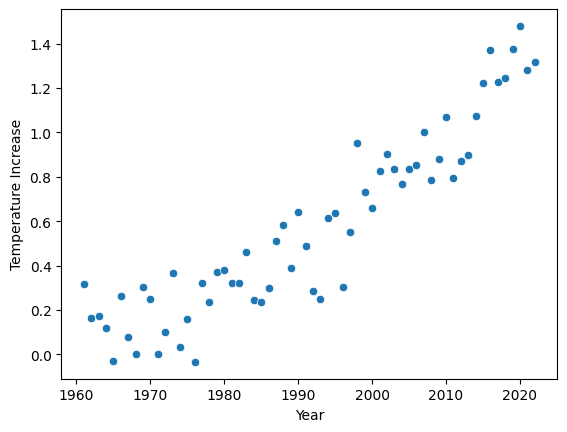

In [52]:
sns.scatterplot(x='Year',y = 'Temperature Increase',data=data)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
data.head()

,Year,Temperature Increase
0,1961,0.316818
1,1962,0.164374
2,1963,0.172560
3,1964,0.119288
4,1965,-0.028827


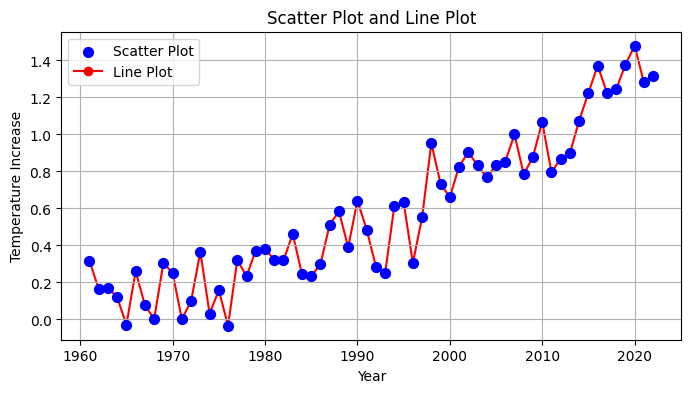

In [55]:
import matplotlib.pyplot as plt
X = data['Year']
y = data['Temperature Increase']

# Scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Scatter Plot', s=50, zorder=2)  # Increase marker size and set zorder

# Line plot
plt.plot(X, y, marker='o', linestyle='-', color='red', label='Line Plot', zorder=1)

plt.title('Scatter Plot and Line Plot')
plt.xlabel('Year')
plt.ylabel('Temperature Increase')
plt.legend()
plt.grid()
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()

In [59]:
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [60]:
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Compute RMSE from MSE
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)

Mean Absolute Error (MAE): 0.17291867302351666
Mean Squared Error (MSE): 0.04009176240246447
Root Mean Squared Error (RMSE): 0.2002292745890682
R-squared (R2 Score): 0.7651768531883528


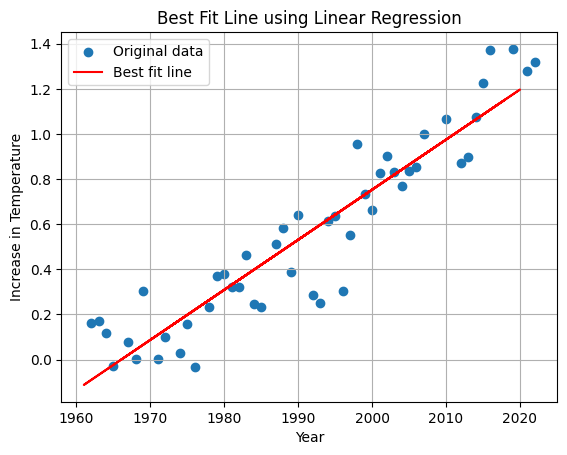

Slop is =  [0.02219216]  and intercept is =  [-43.63116921]


In [64]:
# Plotting the original data points and the best fit line
plt.scatter(X_train, y_train, label='Original data')
plt.plot(X_test, y_pred, color='red', label='Best fit line')
plt.xlabel('Year')
plt.ylabel('Increase in Temperature')
plt.title('Best Fit Line using Linear Regression')
plt.legend()
plt.grid()
plt.show()

# Getting the coefficients (slope and intercept) of the best fit line
slope = model.coef_[0]
intercept = model.intercept_
print("Slop is = ",slope," and intercept is = ",intercept)

In [65]:
year_to_predict = 2024
year_to_predict = np.array(year_to_predict).reshape(-1, 1)

temp_increase = model.predict(year_to_predict)
print(temp_increase)

[[1.28576239]]


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'data' is your DataFrame with columns 'Year' and 'Temperature Increase'
# Load your dataset or replace this with your data loading code
# data = pd.read_csv('your_dataset.csv')

# Split the data into features (X) and target variable (y)
X = data[['Year']]
y = data['Temperature Increase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test_scaled)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")


RMSE: 0.2002
MSE: 0.0401
MAE: 0.1729


In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'data' is your DataFrame with columns 'Year' and 'Temperature Increase'

# Combine the training and testing data for model training
X_all = pd.concat([X_train, X_test])
y_all = pd.concat([y_train, y_test])

# Standardize all the data (including the future year 2024)
X_all_scaled = scaler.fit_transform(X_all)

# Initialize and train the Ridge Regression model on all data
alpha_value = 1.0  # You can adjust the alpha value for regularization
ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_all_scaled, y_all)

# Predict the 'Temperature Increase' for the year 2024
temperature_2024_pred_ridge = ridge_model.predict(year_2024_scaled)

print(f"Predicted Temperature Increase in 2024 using Ridge Regression: {temperature_2024_pred_ridge[0]:.4f}")

# Evaluate Ridge Regression model on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate RMSE (Root Mean Squared Error)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE (Ridge Regression): {rmse_ridge:.4f}")

# Calculate MSE (Mean Squared Error)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"MSE (Ridge Regression): {mse_ridge:.4f}")

# Calculate MAE (Mean Absolute Error)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"MAE (Ridge Regression): {mae_ridge:.4f}")


Predicted Temperature Increase in 2024 using Ridge Regression: 1.2336
RMSE (Ridge Regression): 0.1898
MSE (Ridge Regression): 0.0360
MAE (Ridge Regression): 0.1656


In [68]:
# Create a DataFrame with the year 2024
year_2024 = pd.DataFrame({'Year': [2023]})

# Standardize the year 2024 data using the same scaler
year_2024_scaled = scaler.transform(year_2024)

# Predict the 'Temperature Increase' for the year 2024
temperature_2024_pred = linear_model.predict(year_2024_scaled)

print(f"Predicted Temperature Increase in 2024: {temperature_2024_pred[0]:.2f}")


Predicted Temperature Increase in 2024: 1.22


<Axes: xlabel='Temperature Increase'>

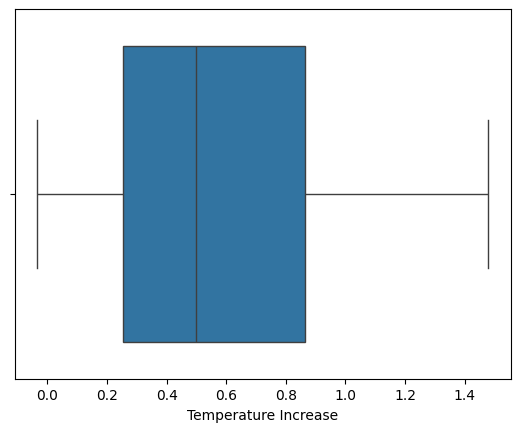

In [69]:
sns.boxplot(data,x='Temperature Increase')

/var/folders/y3/4xy1crns1y5_qhxhtggw6l2c0000gn/T/ipykernel_45181/3719291443.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature Increase'])


<Axes: xlabel='Temperature Increase', ylabel='Density'>

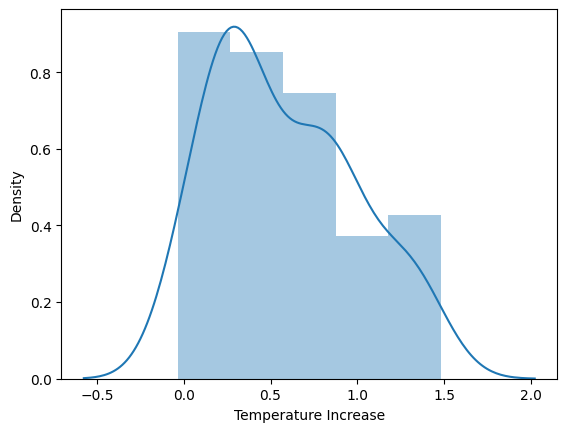

In [70]:
sns.distplot(data['Temperature Increase'])